**Final Projek: Analisis Data Penjualan Supermarket**

**Tujuan Proyek:**

**Menganalisis dataset penjualan untuk mengidentifikasi produk terlaris, performa penjualan di setiap cabang, dan tren pembelian pelanggan untuk memberikan rekomendasi strategi bisnis.**

---

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

**Tugas-Tugas Analisis:**

**Berikut adalah serangkaian tugas yang harus diselesaikan secara berurutan**

**Tahap 1: Memuat dan Membersihkan Data**

- Memuat Data: Buatlah sebuah DataFrame pandas dari data CSV di atas.
- Inspeksi Awal: Tampilkan 5 baris pertama data untuk memahaminya. Gunakan (.info()) untuk melihat tipe data dan informasi non-null.
- Menangani Data Hilang: Identifikasi kolom mana yang memiliki nilai yang hilang (missing values). Gantikan nilai yang hilang di kolom (rating_produk) dengan nilai rata-rata (mean) dari rating produk yang ada.

In [155]:
# load data
df_penjualan = pd.read_csv("data_penjualan.csv")

In [156]:
# Initial Inspection -> display 5 rows

df_penjualan.head()

,id_transaksi,tanggal,cabang,tipe_produk,nama_produk,harga_satuan,jumlah_terjual,rating_produk
0,1001,2025-06-01,Jakarta,Elektronik,Blender,500000,2,4.5
1,1002,2025-06-02,Jakarta,Makanan,Roti Tawar,15000,5,4.0
2,1003,2025-06-03,Bandung,Minuman,Susu UHT,20000,10,4.8
3,1004,2025-06-04,Surabaya,Elektronik,Microwave,1200000,1,4.2
4,1005,2025-06-05,Jakarta,Minuman,Kopi Instan,30000,8,4.6


In [157]:
# handling missing values
# df_penjualan.isna().sum().plot(kind="bar") 
# plt.show() 

df_penjualan.isna().sum()

df_penjualan['rating_produk'] = df_penjualan['rating_produk'].fillna(df_penjualan['rating_produk'].mean()).round(1)
df_penjualan




,id_transaksi,tanggal,cabang,tipe_produk,nama_produk,harga_satuan,jumlah_terjual,rating_produk
0,1001,2025-06-01,Jakarta,Elektronik,Blender,500000,2,4.5
1,1002,2025-06-02,Jakarta,Makanan,Roti Tawar,15000,5,4.0
2,1003,2025-06-03,Bandung,Minuman,Susu UHT,20000,10,4.8
3,1004,2025-06-04,Surabaya,Elektronik,Microwave,1200000,1,4.2
4,1005,2025-06-05,Jakarta,Minuman,Kopi Instan,30000,8,4.6
5,1006,2025-07-06,Bandung,Makanan,Mie Instan,3000,20,4.7
6,1007,2025-07-07,Surabaya,Elektronik,Blender,500000,1,4.5
7,1008,2025-07-08,Jakarta,Makanan,Beras,60000,3,4.5
8,1009,2025-07-09,Bandung,Minuman,Teh Celup,12000,15,4.3
9,1010,2025-08-10,Surabaya,Makanan,Minyak Goreng,40000,4,4.9


---

**Tahap 2: Analisis dan Manipulasi Data**

- Membuat Kolom Baru: Buat kolom baru bernama total_pendapatan yang merupakan hasil perkalian dari harga_satuan dan jumlah_terjual.
- Analisis Deskriptif: Tampilkan ringkasan statistik (summary statistics) untuk kolom-kolom numerik seperti harga_satuan, jumlah_terjual, dan total_pendapatan.
- Sorting: Urutkan DataFrame berdasarkan total_pendapatan dari yang terbesar hingga terkecil untuk melihat transaksi dengan pendapatan tertinggi.
- Subset Data: Buat DataFrame baru yang hanya berisi penjualan dari cabang 'Jakarta' dengan total_pendapatan di atas Rp 200.000.

In [158]:
# add new coloumn

df_penjualan["total_pendapatan"] = df_penjualan["harga_satuan"] * df_penjualan["jumlah_terjual"]
df_penjualan.head()

,id_transaksi,tanggal,cabang,tipe_produk,nama_produk,harga_satuan,jumlah_terjual,rating_produk,total_pendapatan
0,1001,2025-06-01,Jakarta,Elektronik,Blender,500000,2,4.5,1000000
1,1002,2025-06-02,Jakarta,Makanan,Roti Tawar,15000,5,4.0,75000
2,1003,2025-06-03,Bandung,Minuman,Susu UHT,20000,10,4.8,200000
3,1004,2025-06-04,Surabaya,Elektronik,Microwave,1200000,1,4.2,1200000
4,1005,2025-06-05,Jakarta,Minuman,Kopi Instan,30000,8,4.6,240000


In [159]:
# descriptive analyst
summary = df_penjualan[["harga_satuan", "jumlah_terjual", "total_pendapatan"]].describe()
summary

,harga_satuan,jumlah_terjual,total_pendapatan
count,1.500000e+01,15.000000,1.500000e+01
mean,2.153667e+05,7.866667,3.550667e+05
std,3.382671e+05,8.373996,3.479393e+05
min,3.000000e+03,1.000000,6.000000e+04
25%,1.550000e+04,2.000000,1.325000e+05
50%,3.000000e+04,4.000000,2.000000e+05
75%,4.000000e+05,11.000000,5.050000e+05
max,1.200000e+06,30.000000,1.200000e+06


In [160]:
# sorting dataframe
sort = df_penjualan.sort_values("total_pendapatan", ascending=False) # you can add inplace=True without assigmen variable
sort

,id_transaksi,tanggal,cabang,tipe_produk,nama_produk,harga_satuan,jumlah_terjual,rating_produk,total_pendapatan
3,1004,2025-06-04,Surabaya,Elektronik,Microwave,1200000,1,4.2,1200000
0,1001,2025-06-01,Jakarta,Elektronik,Blender,500000,2,4.5,1000000
11,1012,2025-08-12,Bandung,Elektronik,Setrika,300000,2,4.1,600000
13,1014,2025-08-14,Jakarta,Elektronik,Blender,510000,1,4.5,510000
6,1007,2025-07-07,Surabaya,Elektronik,Blender,500000,1,4.5,500000
10,1011,2025-08-11,Jakarta,Minuman,Susu UHT,21000,12,4.8,252000
4,1005,2025-06-05,Jakarta,Minuman,Kopi Instan,30000,8,4.6,240000
2,1003,2025-06-03,Bandung,Minuman,Susu UHT,20000,10,4.8,200000
7,1008,2025-07-08,Jakarta,Makanan,Beras,60000,3,4.5,180000
8,1009,2025-07-09,Bandung,Minuman,Teh Celup,12000,15,4.3,180000


In [161]:
# subset data yang berisi penjualan berasal dari cabang jakarta dengan total pendapatan di atas 200K

jakarta_branch = df_penjualan[(df_penjualan["cabang"] == "Jakarta") & (df_penjualan["total_pendapatan"] > 200000)]
jakarta_branch

,id_transaksi,tanggal,cabang,tipe_produk,nama_produk,harga_satuan,jumlah_terjual,rating_produk,total_pendapatan
0,1001,2025-06-01,Jakarta,Elektronik,Blender,500000,2,4.5,1000000
4,1005,2025-06-05,Jakarta,Minuman,Kopi Instan,30000,8,4.6,240000
10,1011,2025-08-11,Jakarta,Minuman,Susu UHT,21000,12,4.8,252000
13,1014,2025-08-14,Jakarta,Elektronik,Blender,510000,1,4.5,510000


---

**Tahap 3: Grouping dan Agregasi**

- Performa Cabang: Kelompokkan data berdasarkan cabang dan hitung total pendapatan untuk setiap cabang. Cabang mana yang memiliki pendapatan tertinggi? 
- Produk Terlaris: Gunakan groupby() untuk menemukan produk (nama_produk) yang paling banyak terjual secara keseluruhan (berdasarkan jumlah_terjual).
- Pivot Table: Buat sebuah pivot table yang menunjukkan total pendapatan (total_pendapatan) untuk setiap tipe_produk di setiap cabang. Ini akan membantu manajemen melihat tipe produk apa yang laku di cabang mana.

In [173]:
# pendapatan  dari performa tiap cabang

branch_perform = df_penjualan.groupby("cabang")["total_pendapatan"].sum().sort_values(ascending=True)
b = branch_perform.reset_index()
print("cabang dengan Pendapatan Tertinggi")
print("=" * 30)
print(b)

print("=" * 50)
top_cabang = branch_perform.idxmax()        # nama cabang dengan pendapatan tertinggi
top_pendapatan = branch_perform.max()       # nilai pendapatan tertinggi

print(f"Cabang dengan Pendapatan Tertinggi adalah: {top_cabang} dengan total pendapatan Rp{top_pendapatan:,}")
print("=" * 50)




cabang dengan Pendapatan Tertinggi
     cabang  total_pendapatan
0   Bandung           1145000
1  Surabaya           1924000
2   Jakarta           2257000
Cabang dengan Pendapatan Tertinggi adalah: Jakarta dengan total pendapatan Rp2,257,000


In [163]:
# Produk Terlaris

best_selling_product = df_penjualan.groupby("nama_produk")["jumlah_terjual"].sum()
total_terjual_per_produk_sorted = best_selling_product.sort_values(ascending=False)

# Ambil produk dengan penjualan terbanyak (top 1)
best_selling_product = total_terjual_per_produk_sorted.index[0] # take index
best_selling_qty = total_terjual_per_produk_sorted.iloc[0] # take value iloc always value

print(f"Produk dengan penjualan paling banyak secara keseluruhan adalah: {best_selling_product} dengan jumlah terjual {best_selling_qty}")

Produk dengan penjualan paling banyak secara keseluruhan adalah: Mie Instan dengan jumlah terjual 50


In [ ]:
# total pendapatan with pivot table yang menunjukan total pendapatan sebgai values untuk setiap baris tipe produk di setipa cabang

total_pendapatan_tipe_produk_percabang = df_penjualan.pivot_table(values="total_pendapatan", index="tipe_produk", columns="cabang", aggfunc="sum")
print("total pendapatan tipe produk setiap cabang")
print("=" * 50)
total_pendapatan_tipe_produk_percabang


#index: Menjadi baris dari tabel baru Anda.
#columns: Menjadi kolom dari tabel baru Anda.
#values: Kolom yang datanya ingin Anda hitung atau agregasi.

total pendapatan tipe produk setiap cabang


cabang,Bandung,Jakarta,Surabaya
tipe_produk,,,
Elektronik,600000.0,1510000.0,1700000.0
Makanan,165000.0,255000.0,224000.0
Minuman,380000.0,492000.0,NaN


---

**Tahap 4: Visualisasi Sederhana**

- Distribusi Harga: Buat histogram untuk kolom harga_satuan untuk melihat distribusi harga produk.
- Pendapatan per Cabang: Buat bar plot (diagram batang) yang memvisualisasikan total pendapatan dari setiap cabang yang sudah Anda hitung di Tahap 3. Beri judul yang sesuai pada plot Anda, misalnya "Total Pendapatan per Cabang".

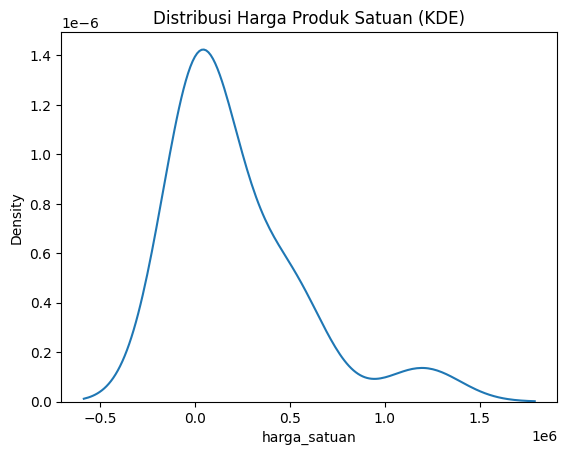

2.029512311810322

In [172]:
# Ditribusi harga

# df_penjualan["harga_satuan"].hist() 
# plt.show() 

import seaborn as sns
sns.kdeplot(df_penjualan["harga_satuan"], fill=False)
plt.title("Distribusi Harga Produk Satuan (KDE)")
plt.show()

df_penjualan["harga_satuan"].skew()

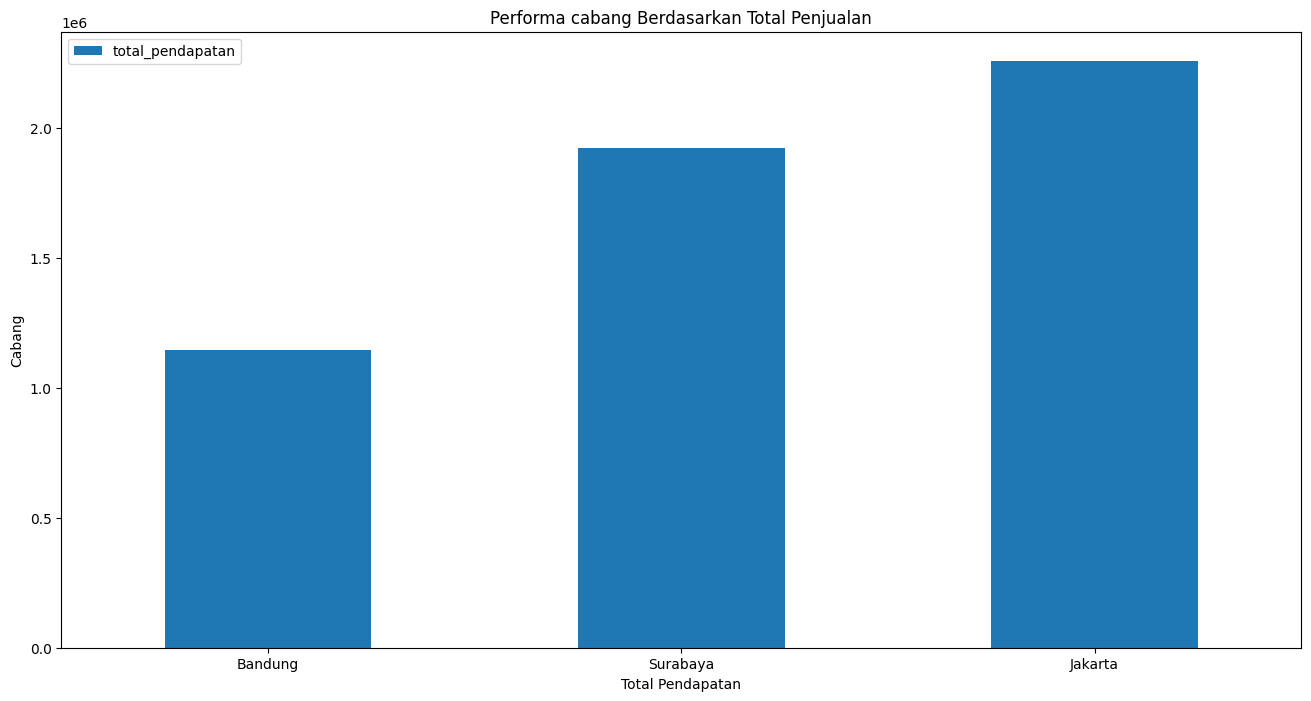

In [188]:
# pendapatan percabang
b.plot(kind="bar", x="cabang", y="total_pendapatan", figsize=(16, 8))
plt.title("Performa cabang Berdasarkan Total Penjualan")
plt.xticks(rotation=360)
plt.ylabel("Cabang")
plt.xlabel("Total Pendapatan")

plt.show()